import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [20]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/53

make measure image

In [8]:
def_img = io.imread("image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 1\\9-27-34 PM\\11.13.2020 (1) 0240.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

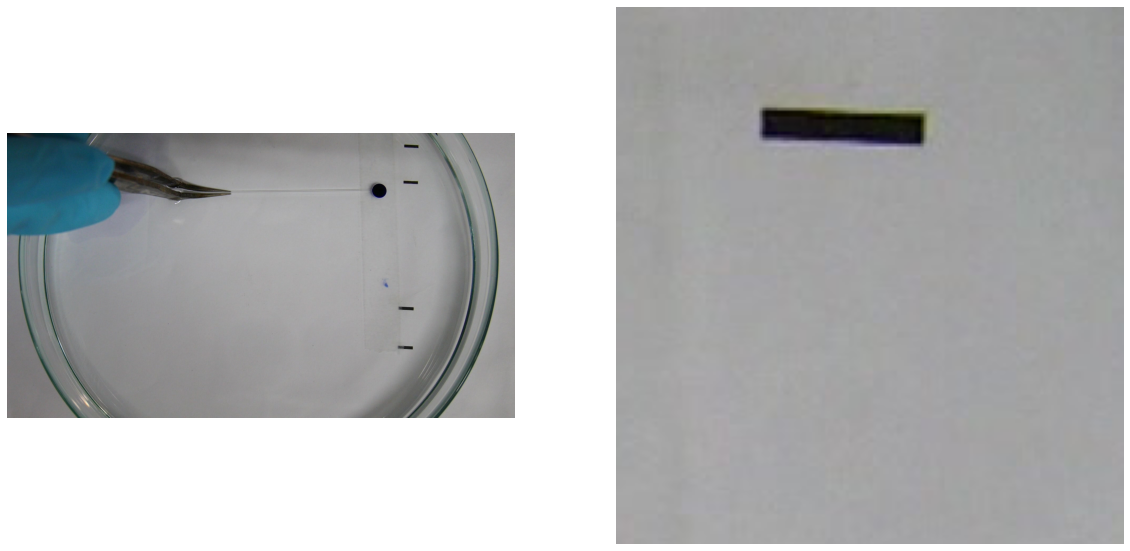

In [17]:
measure_im = crop(def_img, ((150, 750), (1450, 300), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

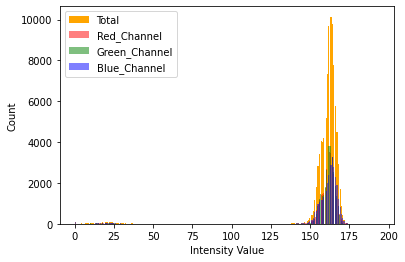

In [18]:
plot_histogram(measure_im)

[39, 49]
[41, 102]


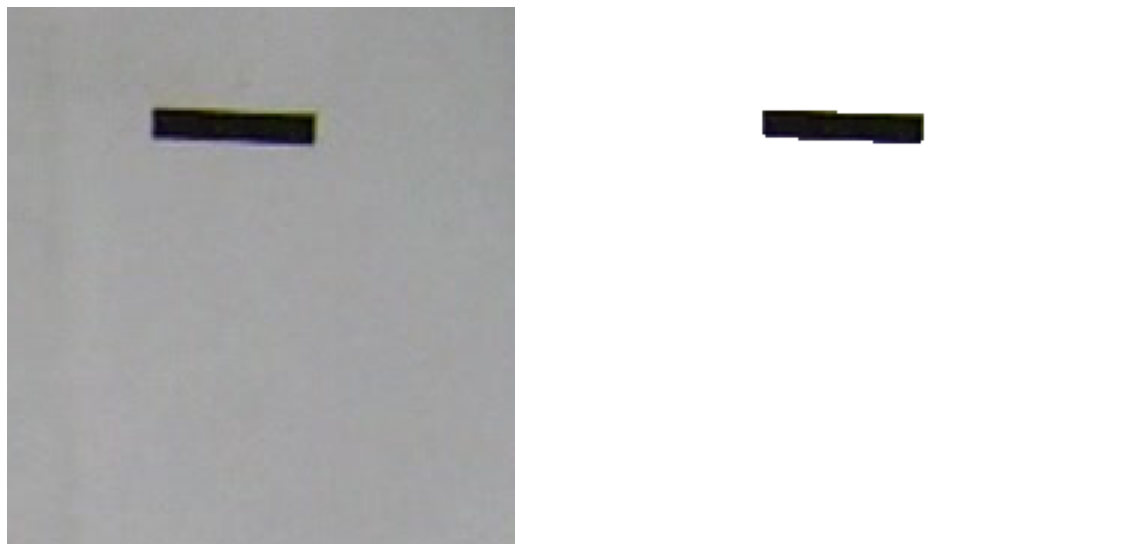

length of picture is  53.03772242470448 pixel


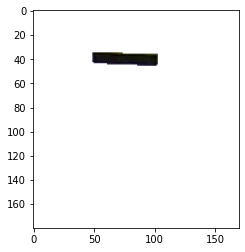

In [19]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

53 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 53


find definition length first picture

(1080, 1920, 3) (180, 620, 3)


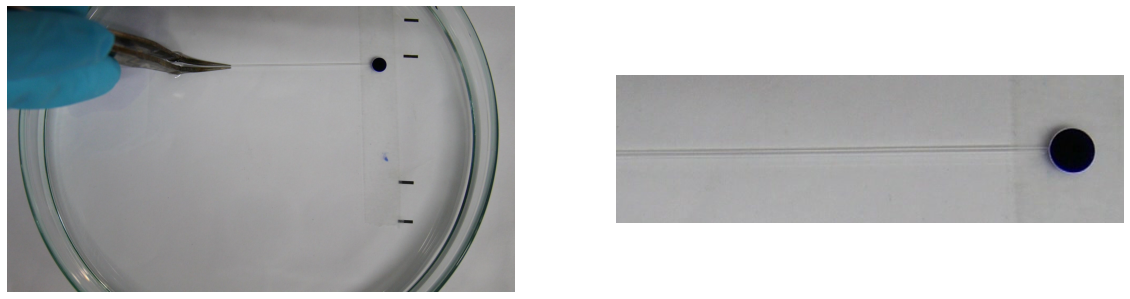

In [25]:
def_crop_im = crop(def_img, ((130, 770), (850, 450), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

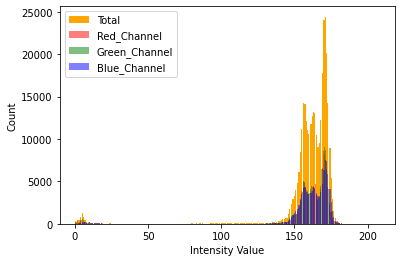

In [26]:
plot_histogram(def_crop_im)

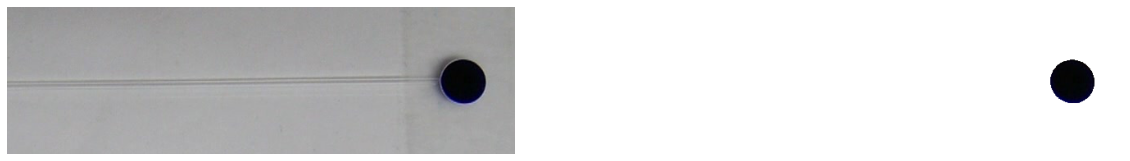

In [27]:
Tdef_img2 = thresholding(45,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[91, 530]
[93, 583]
ldef  53.03772242470448 pixel


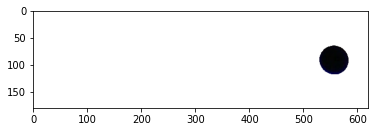

In [28]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 0240 to 0320

In [29]:
number_of_picture = 240
thresh = 45
template1 = []
l_def = 53.03772242470448
for i in range(320-240+1):
    if(True) :   
        image = mpimg.imread( "image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 1\\9-27-34 PM\\11.13.2020 (1) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((130, 770), (850, 450), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [30]:
print(template1)
print(len(template1))

[0, 7, 10, 13, 17, 24, 30, 35, 41, 47, 53, 59, 65, 71, 76, 81, 89, 95, 101, 530, 529, 530, 530, 530, 530, 530, 530, 530, 530, 161, 530, 173, 178, 184, 189, 194, 199, 204, 210, 215, 221, 226, 231, 236, 242, 246, 252, 257, 262, 267, 272, 277, 282, 288, 292, 297, 303, 306, 313, 318, 325, 327, 328, 336, 340, 347, 350, 355, 359, 365, 369, 376, 379, 383, 388, 393, 397, 403, 407, 412, 416]
81


find length on crop value 2 from 0321 to 1176

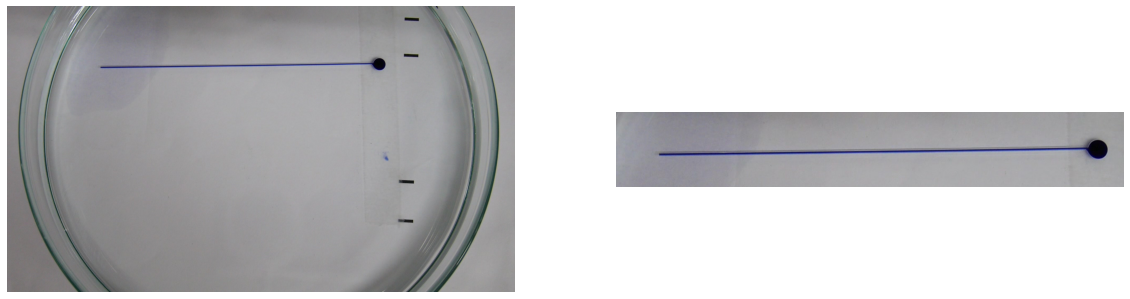

In [33]:
image = mpimg.imread( "image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 1\\9-27-34 PM\\11.13.2020 (1) " + str(1176).zfill(4) + ".jpg" )
crop_image = crop(image, ((130, 770), (250, 450), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [34]:
number_of_picture = 321
thresh = 45
template2 = []
l_def = 53.03772242470448
for i in range(1176-321+1):
    if( True) :
        image = mpimg.imread( "image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 1\\9-27-34 PM\\11.13.2020 (1) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((130, 770), (250, 450), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [35]:
print(template2)
print(len(template2))

[419, 424, 429, 435, 439, 442, 447, 451, 457, 461, 465, 471, 476, 479, 483, 488, 492, 497, 501, 505, 509, 513, 518, 523, 527, 531, 535, 539, 545, 549, 554, 557, 560, 563, 569, 574, 578, 582, 586, 590, 594, 598, 602, 606, 611, 615, 618, 622, 625, 630, 635, 640, 644, 648, 650, 654, 658, 662, 666, 670, 675, 678, 681, 685, 689, 693, 697, 701, 704, 708, 711, 716, 720, 722, 726, 730, 734, 738, 742, 746, 747, 752, 755, 758, 764, 767, 770, 772, 776, 779, 784, 788, 789, 793, 795, 799, 802, 806, 810, 813, 816, 818, 821, 825, 828, 831, 834, 838, 840, 843, 847, 851, 853, 856, 859, 862, 865, 868, 871, 874, 877, 880, 883, 885, 888, 891, 894, 897, 899, 903, 905, 907, 910, 913, 917, 919, 922, 924, 926, 929, 932, 935, 937, 939, 941, 945, 947, 949, 952, 955, 957, 959, 960, 962, 964, 965, 967, 970, 972, 972, 974, 976, 978, 980, 982, 984, 986, 989, 991, 993, 995, 996, 998, 999, 1001, 1002, 1004, 1005, 1007, 1007, 1008, 1009, 1010, 1010, 1011, 1012, 1012, 1013, 1014, 1014, 1015, 1015, 1016, 1016, 1017, 101

concat 2 template and calculate pixel to centimeter

In [36]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [37]:
print(l_array)

[0.         0.06603774 0.09433962 0.12264151 0.16037735 0.2264151
 0.28301886 0.3301887  0.38679245 0.44339624 0.5        0.5566038
 0.6132075  0.6698113  0.7169811  0.7641509  0.8396226  0.8962264
 0.9528302  5.         4.9905663  5.         5.         5.
 5.         5.         5.         5.         5.         1.518868
 5.         1.6320754  1.6792452  1.735849   1.7830188  1.8301886
 1.8773584  1.9245284  1.981132   2.028302   2.0849056  2.1320755
 2.1792452  2.2264152  2.2830188  2.3207548  2.3773584  2.4245284
 2.471698   2.518868   2.5660377  2.6132076  2.6603773  2.7169812
 2.7547169  2.8018868  2.8584905  2.8867924  2.95283    3.
 3.0660377  3.0849056  3.0943396  3.1698112  3.2075472  3.2735848
 3.3018868  3.3490567  3.3867924  3.4433963  3.481132   3.54717
 3.5754716  3.6132076  3.6603773  3.7075472  3.7452831  3.8018868
 3.8396227  3.8867924  3.9245284  3.95283    4.         4.0471697
 4.1037736  4.1415095  4.1698112  4.216981   4.254717   4.311321
 4.3490567  4.3867927  4.443

export data to exel

In [38]:
import pandas as pd

In [39]:
print(len(l_array))

937


In [40]:
data = []
num_img = 240
for i in range(len(l_array)):
    data.append(( " 11.13.2020 (1) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('HeptaneTRITON-0.02(1)_11.13.2020_9-27-34-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


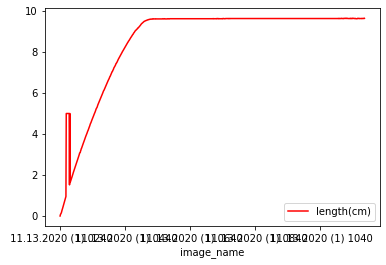

In [41]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()